# Automatyzacja pracy z danymi przestrzennymi w Pythonie i GeoPandas

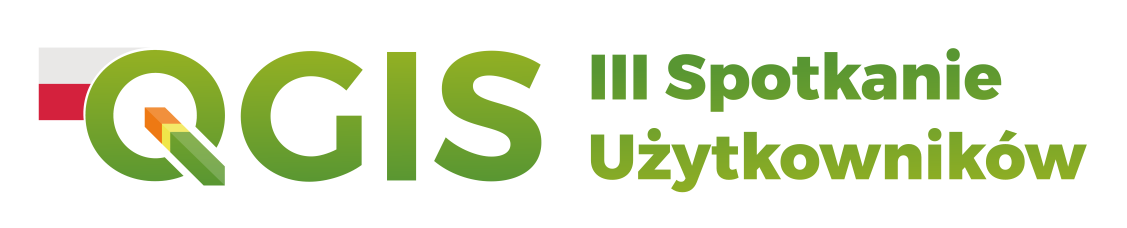

## Meta


- **Prowadzący**: Szymon Moliński (Digitree SA)
- **Data**: 2024-06-26
- **Miejsce**: Poznań
- **Część**: 3

## Funkcje pakietu `GeoPandas`

W tym przykładzie przyjrzymy się bliżej kolumnie geometrii. Jest to specyficzny rodzaj indeksu, może przechowywać różne rodzaje geometrii spośród następujących bazowych typów:

- `Point` (_0 D_) - punkty, obliczenia dystansu między obiektami
- `Line` (_1 D_) - linie, wyszukiwanie ścieżek
- `Polygon` (_2 D_) - agregacja danych i kartogramy

Tylko jedna kolumna w `GeoDataFrame` może mieć **łatkę** (parametr) `geometry`, możemy mieć więcej kolumn z geometrią, z różnymi rodzajami projekcji, ale wszystkie metody będą odnosić się tylko do jednej, wybranej kolumny. Zademonstrujemy to na przykładzie.

In [ ]:
import geopandas as gpd
import numpy as np


FNAME = "nypp_20d/nypp.shp"

In [ ]:
# Połącz się z drive

In [ ]:
fpath = "/content/drive/MyDrive/geopandas-workshops/nypp_20d.zip"
gdf = gpd.read_file(
    "zip://" + fpath + "!" + FNAME
)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Precinct    77 non-null     int64   
 1   Shape_Leng  77 non-null     float64 
 2   Shape_Area  77 non-null     float64 
 3   geometry    77 non-null     geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 2.5 KB


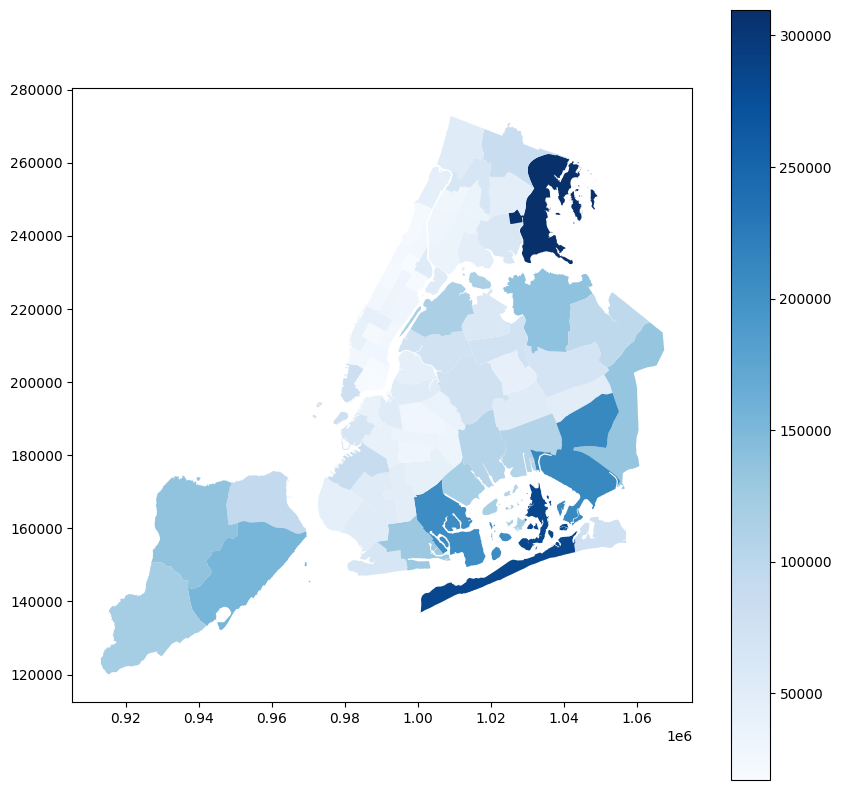

In [ ]:
# Plot

gdf.plot(figsize=(10, 10), column='Shape_Leng', cmap='Blues', legend=True);

### Analiza atrybutów `GeoDataFrame`

W dalszej części przyjrzymy się tym atrybutom przestrzennej ramki danych:

- `area`
- `bounds`
- `total_bounds`
- `geom_type`
- `is_valid`

#### `area`

In [ ]:
gdf.head()

,Precinct,Shape_Leng,Shape_Area,geometry
0,1,80969.426497,4.731588e+07,"MULTIPOLYGON (((972081.788 190733.467, 972184...."
1,5,18676.124259,1.808880e+07,"POLYGON ((987399.207 202660.992, 987385.830 20..."
2,6,26402.900691,2.209819e+07,"POLYGON ((984337.592 208351.106, 985125.733 20..."
3,7,17301.308681,1.836402e+07,"POLYGON ((991608.632 201215.231, 991592.144 20..."
4,9,19773.233396,2.139423e+07,"POLYGON ((992119.124 204042.761, 992114.154 20..."


In [ ]:
gdf['area_gpd'] = gdf.area

In [ ]:
gdf.head()

,Precinct,Shape_Leng,Shape_Area,geometry,area_gpd
0,1,80969.426497,4.731588e+07,"MULTIPOLYGON (((972081.788 190733.467, 972184....",4.731581e+07
1,5,18676.124259,1.808880e+07,"POLYGON ((987399.207 202660.992, 987385.830 20...",1.808880e+07
2,6,26402.900691,2.209819e+07,"POLYGON ((984337.592 208351.106, 985125.733 20...",2.209819e+07
3,7,17301.308681,1.836402e+07,"POLYGON ((991608.632 201215.231, 991592.144 20...",1.836373e+07
4,9,19773.233396,2.139423e+07,"POLYGON ((992119.124 204042.761, 992114.154 20...",2.139409e+07


In [ ]:
(gdf['Shape_Area'] == gdf['area_gpd']).any()

False

Powierzchnia obliczona przez `GeoPandas` nie jest równa powierzchni danej przez dostawcę danych. Może to mieć związek z obliczeniami zmiennoprzecinkowymi i rozdzielczością dostępnych danych, dlatego należy zachować ostrożność w wyznaczaniu powierzchni polygonów.

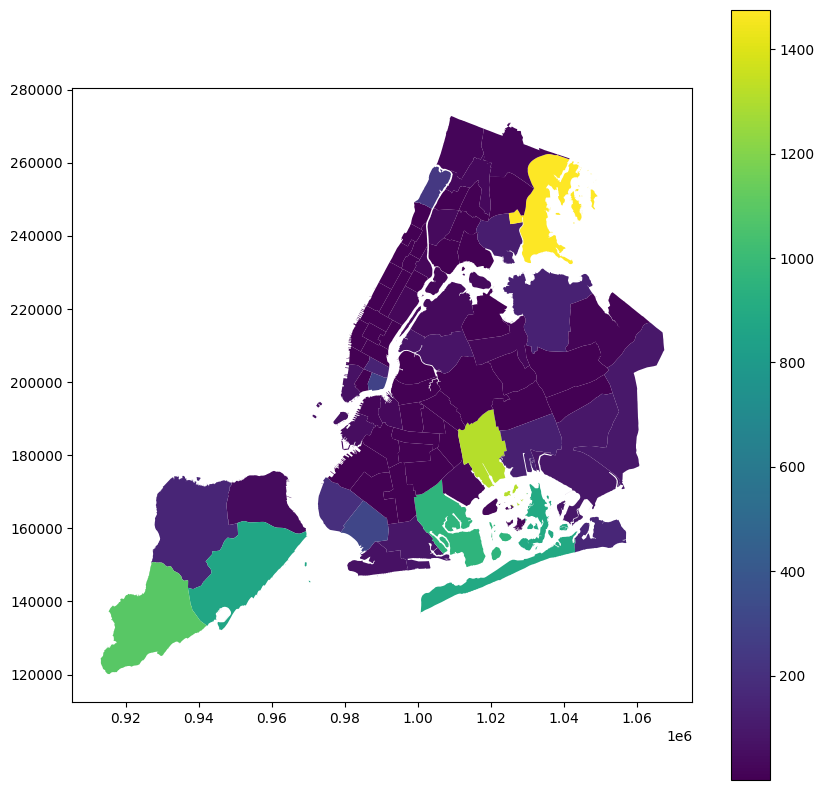

In [ ]:
gdf['area_error'] = np.sqrt((gdf['Shape_Area'] - gdf['area_gpd'])**2)
gdf.plot(figsize=(10, 10), column='area_error', cmap='viridis', legend=True);

In [ ]:
smape_n = np.abs(gdf['area_gpd'] - gdf['Shape_Area'])
smape_d = (np.abs(gdf['area_gpd']) + np.abs(gdf['Shape_Area'])) / 2

smape = np.mean(100 * smape_n / smape_d)
print(f'Symmetrical Mean Absolute Percentage Error of area calculation is {smape}%')

Symmetrical Mean Absolute Percentage Error of area calculation is 9.301398474402119e-05%


#### `bounds`

In [ ]:
gdf.bounds

,minx,miny,maxx,maxy
0,9.710135e+05,188082.322388,9.851448e+05,205061.942383
1,9.825008e+05,197080.708801,9.873992e+05,203570.984192
2,9.803090e+05,203570.984192,9.868124e+05,209792.183838
3,9.862400e+05,197630.773193,9.916086e+05,202660.992004
4,9.851448e+05,201209.096008,9.921191e+05,206998.443237
...,...,...,...,...
72,1.011966e+06,211277.195801,1.025221e+06,226196.820984
73,9.475857e+05,158542.817993,9.693753e+05,175708.962036
74,9.270241e+05,143383.462036,9.507726e+05,174416.462830
75,9.370623e+05,132137.996033,9.705701e+05,161977.456604


#### `total_bounds`

In [ ]:
gdf.total_bounds

array([ 913175.10900879,  120121.88126121, 1067382.50842285,
        272844.29364014])

#### `geom_type` - ile typów i jakie typy geometrii są w mojej ramce?

In [ ]:
(gdf.geom_type).unique()

array(['MultiPolygon', 'Polygon'], dtype=object)

In [ ]:
(gdf.geom_type).nunique()

2

#### `is_valid` - czy geometria nie ma artefaktów?

In [ ]:
gdf.is_valid

0     True
1     True
2     True
3     True
4     True
      ... 
72    True
73    True
74    True
75    True
76    True
Length: 77, dtype: bool

In [ ]:
gdf.is_valid.all()

True

In [ ]:
all(gdf.is_valid)

True

In [ ]:
sum(gdf.is_valid) == len(gdf)

True

### Metody `GeoSeries` i `GeoDataFrame`

Lista metod:

- `distance()`
- `centroid`
- `representative_point()`
- `sample_points()`
- `set_geometry()`
- `to_crs()`
- `plot()`

#### `centroid`

__Centroid__ jest geometrycznym centrum figury. Przydatne do redukcji wymiarowości danych.

In [ ]:
gdf['centroids'] = gdf.centroid
gdf.head()

,Precinct,Shape_Leng,Shape_Area,geometry,area_gpd,area_error,centroids
0,1,80969.426497,4.731588e+07,"MULTIPOLYGON (((972081.788 190733.467, 972184....",4.731581e+07,64.191088,POINT (980903.370 197870.360)
1,5,18676.124259,1.808880e+07,"POLYGON ((987399.207 202660.992, 987385.830 20...",1.808880e+07,0.000043,POINT (985041.130 200285.748)
2,6,26402.900691,2.209819e+07,"POLYGON ((984337.592 208351.106, 985125.733 20...",2.209819e+07,2.151619,POINT (983594.137 206565.861)
3,7,17301.308681,1.836402e+07,"POLYGON ((991608.632 201215.231, 991592.144 20...",1.836373e+07,291.013062,POINT (988700.532 199930.472)
4,9,19773.233396,2.139423e+07,"POLYGON ((992119.124 204042.761, 992114.154 20...",2.139409e+07,141.838555,POINT (988854.638 203875.055)


In [ ]:
gdf.geometry

0     MULTIPOLYGON (((972081.788 190733.467, 972184....
1     POLYGON ((987399.207 202660.992, 987385.830 20...
2     POLYGON ((984337.592 208351.106, 985125.733 20...
3     POLYGON ((991608.632 201215.231, 991592.144 20...
4     POLYGON ((992119.124 204042.761, 992114.154 20...
                            ...                        
72    POLYGON ((1023288.047 217115.763, 1023190.441 ...
73    POLYGON ((969375.294 159223.846, 969236.215 15...
74    MULTIPOLYGON (((939997.095 173013.579, 939915....
75    MULTIPOLYGON (((970217.022 145643.332, 970227....
76    POLYGON ((937062.255 143738.068, 937086.694 14...
Name: geometry, Length: 77, dtype: geometry

#### `representative_point()` i `distance()`

Losowy punkt wewnątrz geometrii.

In [ ]:
r_point = gdf.representative_point()

Taki punkt nie jest tym samym co centroid...

In [ ]:
# Distance from each representative point to centroid

distances = r_point.distance(gdf['centroids'])  # Be careful - see next cells

In [ ]:
distances.mean()

1062.350406880198

In [ ]:
# Distance from geodataframe's polygon to representative point !

gdf.distance(r_point).mean()

0.0

In [ ]:
# Distance from centroids column to representative points

gdf['centroids'].distance(r_point).mean()

1062.350406880198

#### `set_geometry()` - zmienia kolumnę z parametrem `geometry`

In [ ]:
gdf.set_geometry('centroids', inplace=True)

In [ ]:

gdf.distance(r_point).mean()

1062.350406880198

<Axes: >

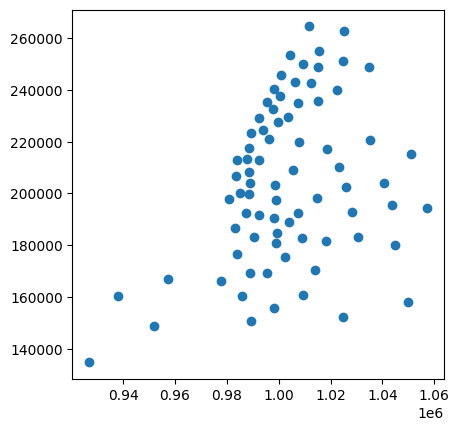

In [ ]:
gdf.plot()

#### `sample_points()`

In [ ]:
sampled_points = gdf.sample_points(10)

<ipython-input-37-8c1cebb8110f>:1: UserWarning: Sampling is not supported for Point geometry type.
  sampled_points = gdf.sample_points(10)


In [ ]:
sampled_points

0     MULTIPOINT EMPTY
1     MULTIPOINT EMPTY
2     MULTIPOINT EMPTY
3     MULTIPOINT EMPTY
4     MULTIPOINT EMPTY
            ...       
72    MULTIPOINT EMPTY
73    MULTIPOINT EMPTY
74    MULTIPOINT EMPTY
75    MULTIPOINT EMPTY
76    MULTIPOINT EMPTY
Name: sampled_points, Length: 77, dtype: geometry

In [ ]:
sampled_points = gdf['geometry'].sample_points(10)

In [ ]:
sampled_points

0     MULTIPOINT (972921.878 194233.966, 977146.661 ...
1     MULTIPOINT (983502.557 199078.749, 983555.139 ...
2     MULTIPOINT (983090.460 205140.294, 983188.472 ...
3     MULTIPOINT (986681.717 199315.071, 987076.661 ...
4     MULTIPOINT (986573.216 203352.871, 986660.405 ...
                            ...                        
72    MULTIPOINT (1015281.520 216515.572, 1015399.65...
73    MULTIPOINT (949861.468 163810.807, 951873.333 ...
74    MULTIPOINT (929581.451 167756.282, 935949.661 ...
75    MULTIPOINT (937745.889 140526.322, 945945.835 ...
76    MULTIPOINT (914898.623 122044.744, 915859.365 ...
Name: sampled_points, Length: 77, dtype: geometry

<Axes: >

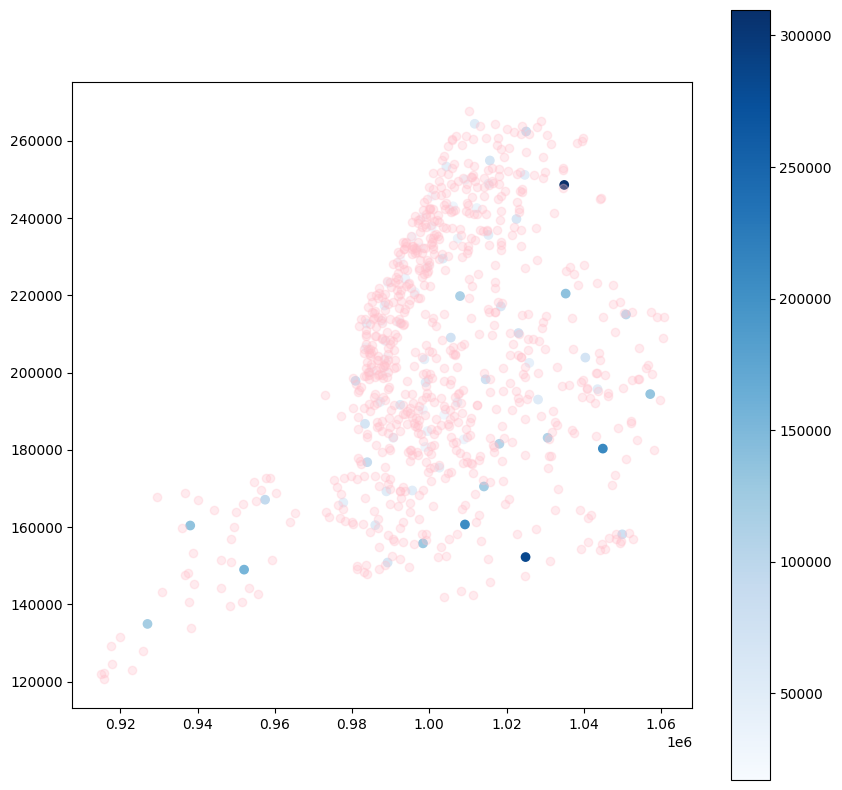

In [ ]:
base = gdf.plot(figsize=(10, 10), column='Shape_Leng', cmap='Blues', legend=True);
sampled_points.plot(ax=base, c='pink', alpha=0.3)

In [ ]:
gdf.set_geometry('geometry', inplace=True)

<Axes: >

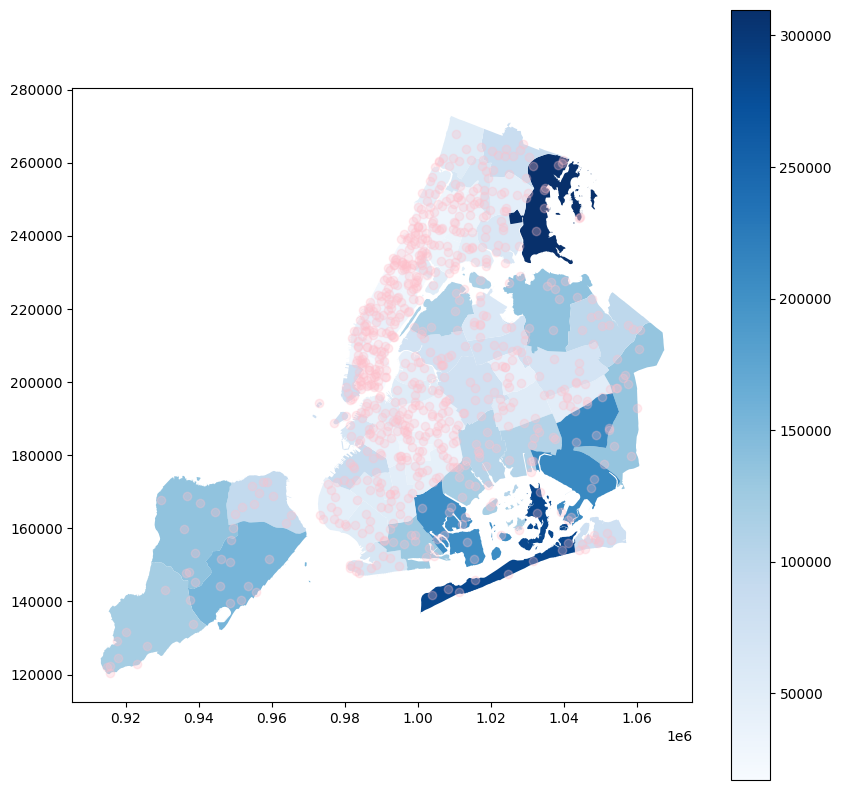

In [ ]:
base = gdf.plot(figsize=(10, 10), column='Shape_Leng', cmap='Blues', legend=True);
sampled_points.plot(ax=base, c='pink', alpha=0.3)

> Zadanie dla dociekliwych: jak ograniczyć liczbę próbek dla mniejszych obszarów tak by nie były one nadreprezentatywne?

### Projekcja danych

Najważniejszym parametrem danych przestrzennych jest rodzaj ich projekcji, w skrócie CRS albo Coordinate Reference System https://en.wikipedia.org/wiki/Spatial_reference_system

Wygodniej korzysta się z kodów EPSG (które są aliasami na CRS). Przykładowo 4326 - projekcja w trakerach GPS, 2180 - projekcja o najmniejszych zniekształceniach do mapowania obszaru Polski. Niektóre z projekcji są w metrach, inne w stopniach. Zobaczymy jak będzie deformować się metropolia Nowego Jorku po transformacjach CRS.

In [ ]:
mercator_spherical = 'EPSG:3857'
gps = 'EPSG:4326'
north_america = '+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m no_defs'

In [ ]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

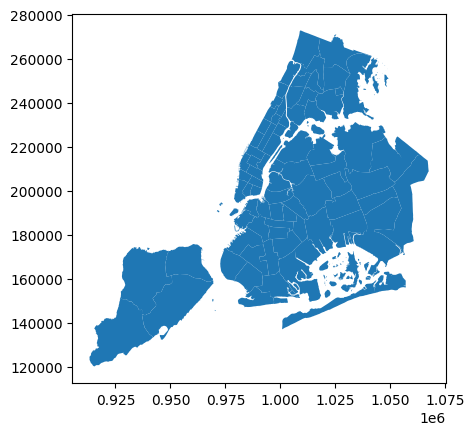

In [ ]:
gdf.plot()

In [ ]:
gdf1 = gdf.to_crs(mercator_spherical)

In [ ]:
gdf1.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

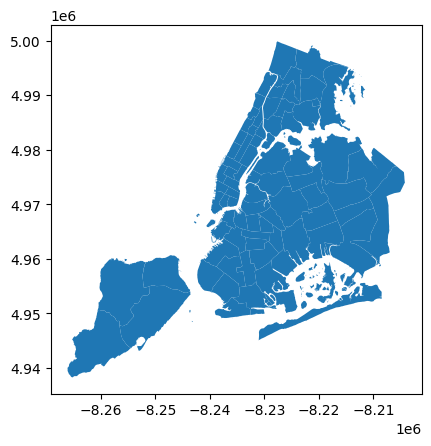

In [ ]:
gdf1.plot()

In [ ]:
gdf2 = gdf.to_crs(gps)
gdf2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

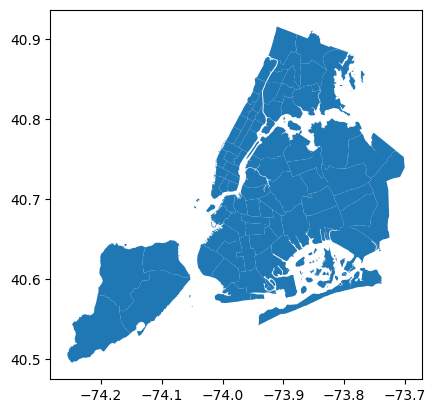

In [ ]:
gdf2.plot()

In [ ]:
gdf3 = gdf.to_crs(north_america)

<Axes: >

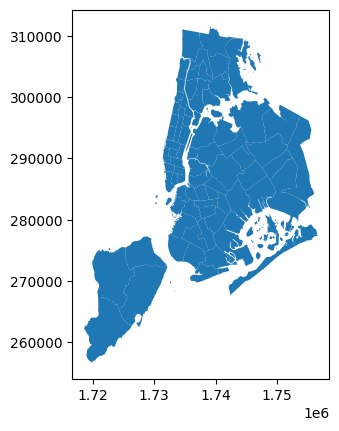

In [ ]:
gdf3.plot()